# Imports

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

# Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.
Visualize the results of your clustering.
Use the elbow method to visually select a good value for k.
Repeat the clustering, this time with 3 different features.
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

# Get the Data

In [2]:
df = data('iris')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


# Split the Data

In [4]:
train, test     = train_test_split(df, train_size=.8, random_state=123)
train, validate = train_test_split(df, train_size=.8, random_state=123)

# Modeling With Petal Width and Sepal Width

In [6]:
X_train = train[['Petal.Width', 'Sepal.Width']]
y_train = train.Species

X_validate = validate[['Petal.Width', 'Sepal.Width']]
y_validate = validate.Species

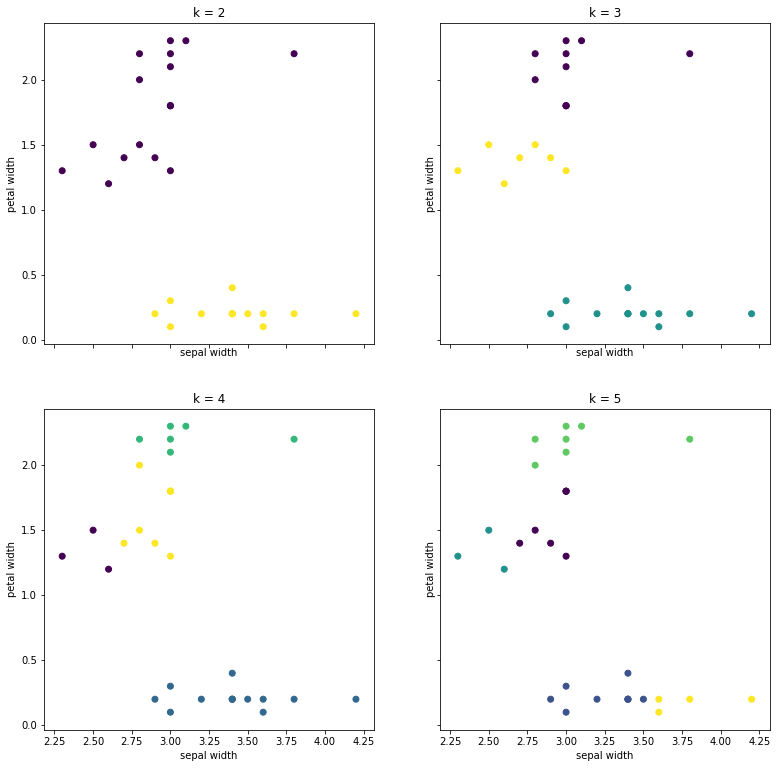

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_train).predict(X_validate)
    ax.scatter(X_validate['Sepal.Width'], X_validate['Petal.Width'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

In [5]:
predictions = pd.DataFrame({'actual': validate.Species})

In [7]:
width_model = KMeans(n_clusters=3).fit(X_train)

predictions['width'] = width_model.predict(X_validate)

In [8]:
predictions.head()

,actual,width
73,versicolor,0
113,virginica,2
133,virginica,2
89,versicolor,0
38,setosa,1
